In [1]:
#Import Packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import os

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#Import the data
dfsmall = pd.read_csv("./lastfm-dataset-360k-small/merged-subset.csv",encoding='ISO-8859-1')
dfsmall = dfsmall.drop('Unnamed: 0',axis=1)

In [3]:
dfsmall.head()

,userId,artistId,artist,plays,gender,age,country,signupDate
0,03b9c645bc4f578ea1dcb6a975e7ea71fab79da2,a16371b9-7d36-497a-a9d4-42b0a0440c5e,slowdive,108,m,28.0,Germany,"Sep 16, 2006"
1,ee48ac7de691d31176a2843d0f2f8f49cab78e6d,5a24bc1a-c093-4a82-84ed-8d7f2da0570d,skinny puppy,407,m,NaN,Canada,"Dec 14, 2006"
2,b2e3d27a00fc3035edb439b14e6d30bcb6dddf69,68f1175b-592b-4f28-ab1c-85c7a438c636,turbonegro,91,m,29.0,United Kingdom,"Sep 23, 2005"
3,b4d4909255dc5bb404ff64866cac60164b465e9a,cfd3727e-7162-4e6a-a3f7-a59343ee6b8d,honey is cool,50,NaN,NaN,Denmark,"Dec 22, 2008"
4,758de8850b5a07875da1e23296e4021574be8596,3bb24e11-821a-4e4e-bd89-e0a2452474cf,useless id,108,m,25.0,Serbia,"Mar 15, 2009"


In [3]:
dfsmall['signupDate'] = pd.to_datetime(dfsmall['signupDate']) # Change_to_datetime
dfsmall['last_date'] = 'March 31, 2010'
dfsmall['last_date'] = pd.to_datetime(dfsmall['last_date']) # Change_to_datetime
dfsmall['timedelta'] = dfsmall['last_date'] - dfsmall['signupDate']
dfsmall['timedelta'] = dfsmall['timedelta'].map(lambda x : x.days)

dfsmall['plays'] = dfsmall['plays'] / dfsmall['timedelta']

dfsmall = dfsmall.drop(['last_date','timedelta'],axis=1)

In [5]:
dfsmall.head()

,userId,artistId,artist,plays,gender,age,country,signupDate
0,03b9c645bc4f578ea1dcb6a975e7ea71fab79da2,a16371b9-7d36-497a-a9d4-42b0a0440c5e,slowdive,0.083591,m,28.0,Germany,2006-09-16
1,ee48ac7de691d31176a2843d0f2f8f49cab78e6d,5a24bc1a-c093-4a82-84ed-8d7f2da0570d,skinny puppy,0.338321,m,NaN,Canada,2006-12-14
2,b2e3d27a00fc3035edb439b14e6d30bcb6dddf69,68f1175b-592b-4f28-ab1c-85c7a438c636,turbonegro,0.055152,m,29.0,United Kingdom,2005-09-23
3,b4d4909255dc5bb404ff64866cac60164b465e9a,cfd3727e-7162-4e6a-a3f7-a59343ee6b8d,honey is cool,0.107759,NaN,NaN,Denmark,2008-12-22
4,758de8850b5a07875da1e23296e4021574be8596,3bb24e11-821a-4e4e-bd89-e0a2452474cf,useless id,0.283465,m,25.0,Serbia,2009-03-15


In [17]:
directory = 'lastfm-dataset-360k-small'

if not os.path.exists(directory):
    os.makedirs(directory)

dfsmall.to_csv('./lastfm-dataset-360k-small/merged-subset2.csv',encoding='utf-8',index=False, sep='\t')

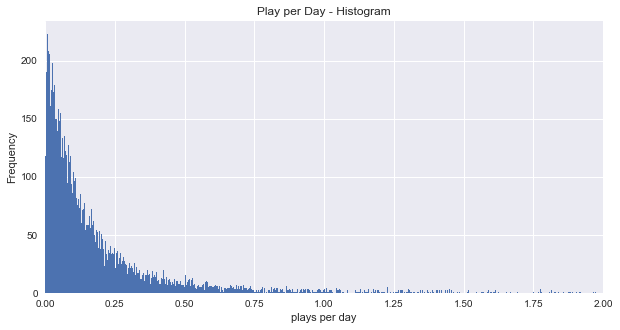

In [9]:
fig = plt.figure(figsize=(10,5))
plt.xlim(0,2)
plt.xlabel("plays per day")
plt.ylabel("Frequency")
plt.title("Play per Day - Histogram")
dfsmall.plays.hist(bins=5000)

In [9]:
print ("Null values in gender -",dfsmall.gender.isnull().sum())
dfsmall.gender.value_counts()

Null values in gender - 908


m    6756
f    2336
Name: gender, dtype: int64

In [11]:
print ("Null values in age -",dfsmall.age.isnull().sum())
dfsmall.age.notnull().sum()

Null values in age - 2040


7960

In [18]:
print ("Null values in country -",dfsmall.country.isnull().sum())
dfsmall.country.value_counts()

Null values in country - 0


United States                             1863
Germany                                    847
United Kingdom                             829
Poland                                     546
Russian Federation                         528
Sweden                                     410
Brazil                                     383
Spain                                      376
Finland                                    351
Netherlands                                278
Italy                                      233
Canada                                     226
France                                     221
Australia                                  196
Turkey                                     182
Japan                                      163
Norway                                     151
Czech Republic                             147
Ukraine                                    121
Belgium                                    114
Mexico                                     105
Austria      

In [21]:
print(list(dfsmall.loc[(dfsmall.gender.notnull()) & (dfsmall.age.notnull())].country.value_counts().index))

['United States', 'Germany', 'United Kingdom', 'Poland', 'Russian Federation', 'Brazil', 'Sweden', 'Spain', 'Finland', 'Netherlands', 'Italy', 'France', 'Canada', 'Australia', 'Turkey', 'Norway', 'Czech Republic', 'Ukraine', 'Japan', 'Belgium', 'Mexico', 'Argentina', 'Switzerland', 'Austria', 'Romania', 'Portugal', 'Bulgaria', 'Chile', 'Denmark', 'Colombia', 'Greece', 'Hungary', 'Latvia', 'Slovakia', 'Croatia', 'Serbia', 'Lithuania', 'Estonia', 'Ireland', 'New Zealand', 'Belarus', 'Israel', 'India', 'Venezuela', 'Indonesia', 'Singapore', 'Slovenia', 'Korea, Republic of', 'China', 'South Africa', 'Malaysia', 'Philippines', 'Peru', 'Thailand', 'Moldova', 'Costa Rica', 'Iceland', 'Taiwan', 'Paraguay', 'Bosnia and Herzegovina', 'Antarctica', 'Puerto Rico', 'Georgia', 'Macedonia', 'Uruguay', 'Honduras', 'Barbados', 'Kazakhstan', 'Andorra', 'Saudi Arabia', 'United States Minor Outlying Islands', 'Djibouti', 'Cocos (Keeling) Islands', 'Tunisia', 'Egypt', 'Bolivia', 'Panama', 'Brunei Darussala

In [22]:
genderdict = {'m':0,'f':1}

def mapr1(key):
    """ Maps numbers to categories (gender)"""
    return genderdict[key]

In [25]:
mapr1('m')

0